<a href="https://colab.research.google.com/github/weibb123/SkLearn_Tutorial/blob/main/sk_learn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* [Supervised Learning: Simple linear regression](#section-one)
* [Supervised Learning: Iris classification](#section-two)
* [Unsupervised Learning: Iris dimensionality](#section-three)
* [Unsupervised Learning: Iris clustering](#section-four)
* [Application: Exploring Handwritten Digits](#section-five)
* [Polynomial Regression](#section-six)
* [Grid Search](#section-seven)
* [Feature Engineering](#section-eight)
* [Imputation of missing data](#section-nine)
* [Feature Pipelines](#section-ten)


<a id="section-one"></a>
# Supervised Learning: Simple linear regression

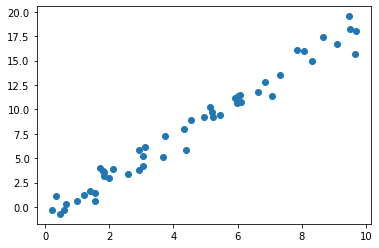

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [3]:
# Arrange data into a features matrix and target vector

X = x[:, np.newaxis]
X.shape

(50, 1)

In [4]:
# fit() learning model parameters 
model.fit(X, y)

print(model.coef_)

print(model.intercept_)

[1.9776566]
-0.9033107255311146


In [5]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

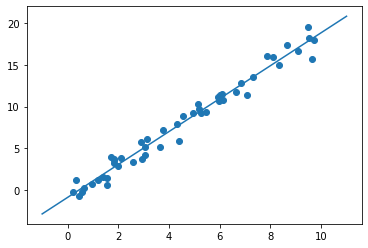

In [6]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

<a id='section-two'></a>
# Supervised Learning: Iris classification

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


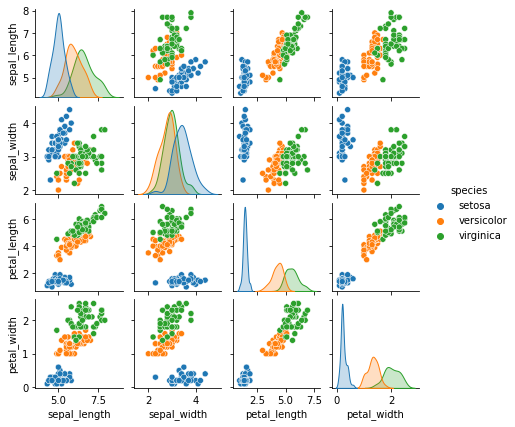

In [7]:
import seaborn as sns
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', size=1.5);

In [8]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [9]:
y_iris = iris['species']
y.shape

(50,)

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                               random_state=1)

In [11]:
from sklearn.naive_bayes import GaussianNB # 1. Choose model class
model = GaussianNB()                       # 2. Instantiate model
model.fit(xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(xtest)             # 4. predict on new data


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

<a id="section-three"></a>
## Unsupervised Learning: Iris dimensionality

Recall Iris data is four dimensional. we want to reduce to 2D to visual data

In [13]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


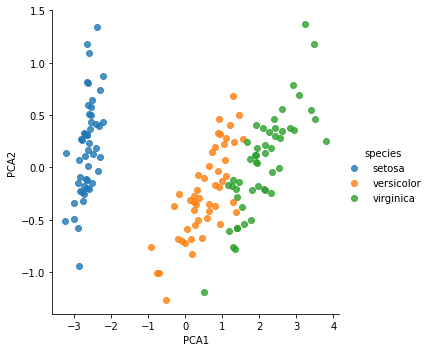

In [14]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

<a id="section-four"></a>
## Unsupervised Learning: Iris clustering

In [15]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=3,
           covariance_type="full")
model.fit(X_iris)
y_gmm = model.predict(X_iris)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


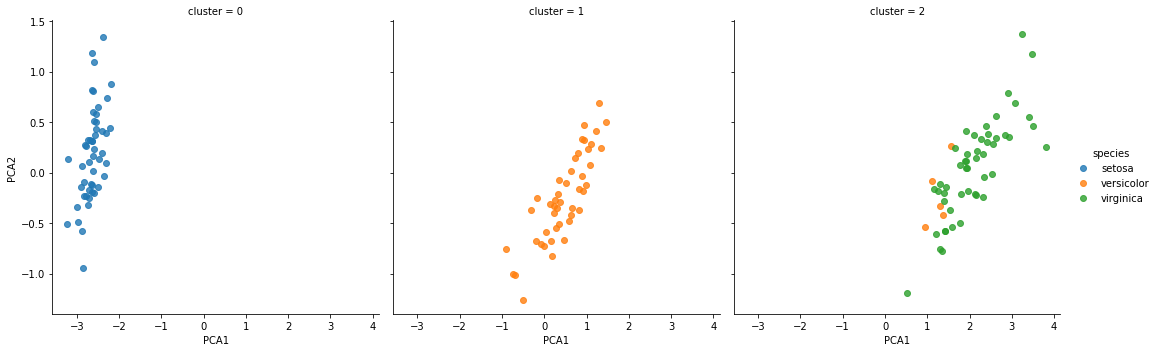

In [16]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
          col='cluster', fit_reg=False)

<a id="section-five"></a>
## Application: Exploring Handwritten Digits

In [17]:
# Load and visualize digits data
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array 1,797 samples 8x8 pixels

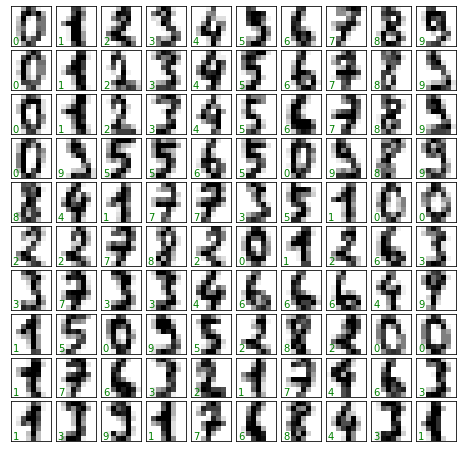

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8,8),
                         subplot_kw={'xticks': [], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [19]:
X = digits.data
X.shape

(1797, 64)

In [20]:
y = digits.target
y.shape

(1797,)

In [21]:
# Visualize data
"""We want to visualize the data, but first we need reduce dimension"""
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data) # transform into 2D
data_projected.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

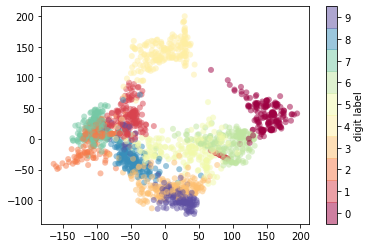

In [22]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none',
           alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [23]:
# Classification on digits
from sklearn.naive_bayes import GaussianNB

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

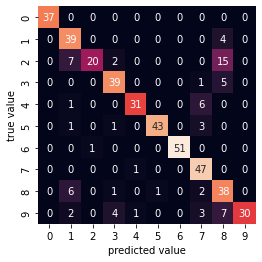

In [25]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

A confusion matrix showing the frequency of misclassifications by our classifer

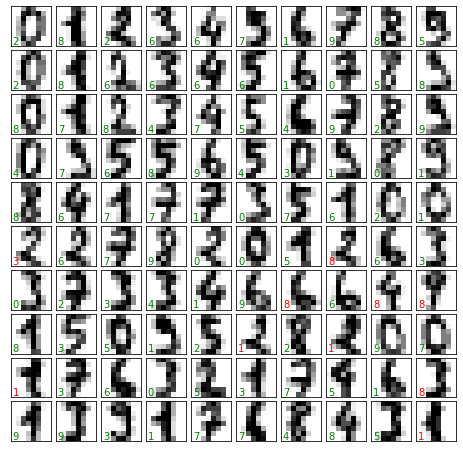

In [26]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')


Data showing correct(green) and incorrect (red) labels

<a id="section-six"></a>
## Polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))



In [28]:
import numpy as np

# Lets Create some data to which we will fit our model
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

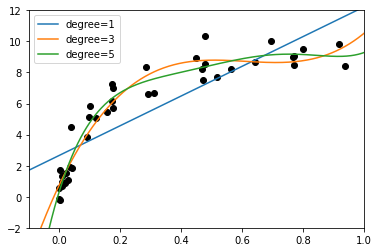

In [29]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

<a id="section-seven"></a>
## Grid Search

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
            'linearregression__fit_intercept': [True, False],
            'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [31]:
grid.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [32]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


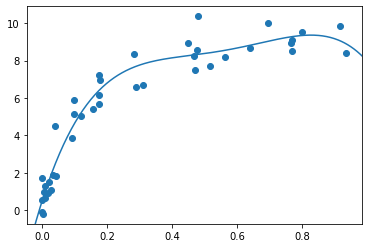

In [33]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);

<a id="section-eight"></a>
## FEATURE ENGINEERING

In [34]:
"When we deal with categorical data, we want to do one-hot-encoding"
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [35]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [36]:
vec.get_feature_names()
"Each column vector refers to a feature name."

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'Each column vector refers to a feature name.'

## Text Features

In [37]:
"Another common type of feature engineering is to convert text to numericals"

sample = ['problem of evil',
         'evil queen',
         'horizontal problem']

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X
print("Output is a sparse matrix recording number of times each word appears")

Output is a sparse matrix recording number of times each word appears


In [38]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,evil,horizontal,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [39]:
"CountVectorizer could lead to features that put too much weight on words"
"Next, we will use TfidfVectorizer"
# TF-IDF weights the word counts by a measure of how often they appear
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,evil,horizontal,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


<a id="section-nine"></a>
## Imputation of Missing Data

In [40]:
import numpy as np
from numpy import nan
X = np.array([[nan, 0, 3],
            [3, 7, 9],
            [3, 5, 2],
            [4, nan, 6],
            [8,8, 1]])
y = np.array([14, 16, -1, 8, -5])

In [41]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2


array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

## Feature of Pipeline

In [42]:
""" The power of pipeline allows us to transform data in multiple steps"""
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                PolynomialFeatures(degree=2),
                LinearRegression())


In [43]:
model.fit(X, y) # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
